# First
First, let's import pandas (for visualization) and matplotlib (for plotting reasons).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Second
Second, we have to read the csv file for the data set of trees in Allegheny County/the Pittsburgh area.

In [3]:
tr = pd.read_csv('tree.csv', low_memory=False)

# The Code
I'm taking the data and removing any values of NaN, or any condition values that equal "Dead" (as they don't matter). From this, we've determined there are a LOT of neighborhoods that only have one Tree-of-Heaven--this is fine, as we can take this info and have options to choose from when we sort through the court data and the arrest data to figure out which neighborhood is the 'best'. It gives us a couple of options, but we can work with that!

In [4]:
tr = tr.dropna()
tree_count = tr.iloc[:, [4, 15, 49]]
query_mask = tree_count['common_name'].str.contains("Tree-of-Heaven", case=False, na=True) & (tree_count['condition'] != 'Dead')
trees = tree_count[query_mask]
total_heav = trees.groupby('neighborhood').size().rename('count')
sor = total_heav.sort_values(ascending=False)
ind = sor.reset_index()
ind

,neighborhood,count
0,Greenfield,15
1,Hazelwood,13
2,East Hills,9
3,Knoxville,9
4,Middle Hill,9
5,Homewood North,8
6,Lincoln-Lemington-Belmar,8
7,Marshall-Shadeland,8
8,Squirrel Hill South,8
9,Brighton Heights,6


# Making a Plot
Below, I've made a plot for the tree data to get a better sense of visualization (and to make the information easier on the eyes). There's a good bit of similar overlap in neighborhoods and how many Tree-of-Heavens have been found there, still, and it's much more visible here then it is seeing '1' over and over again.

Text(0.5, 1.0, 'Amount of Tree-of-Heavens in a Neighborhood')

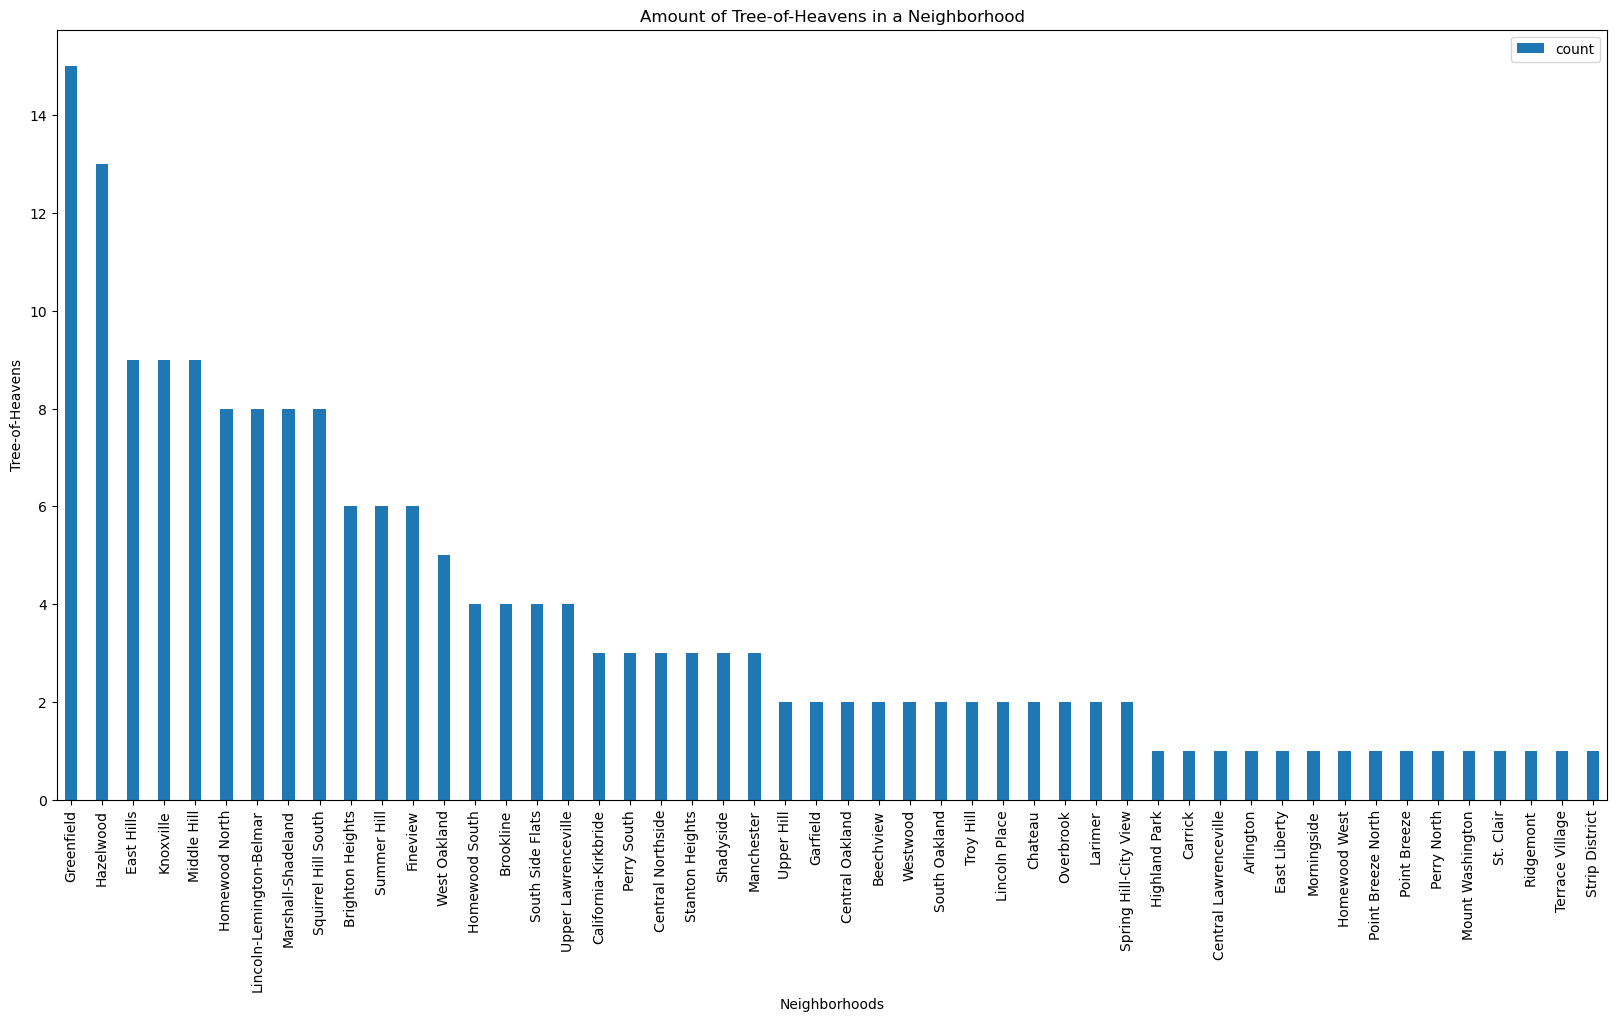

In [6]:
tr_plt = ind.plot(x='neighborhood', y='count', kind='bar', width=.4, figsize=(20, 10))
tr_plt.set_xlabel('Neighborhoods')
tr_plt.set_ylabel('Tree-of-Heavens')
tr_plt.set_title('Amount of Tree-of-Heavens in a Neighborhood')